In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from image_extractor import preprocess_hsv, seperate_chanel

ori =  173.74172973632812


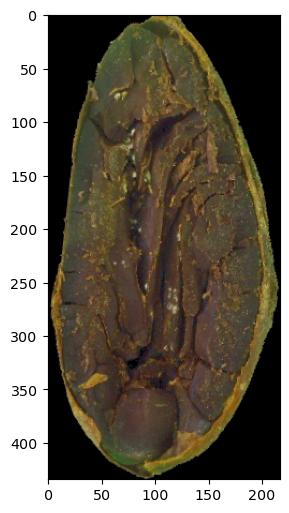

In [54]:
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (100).JPG'
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Brittle/image (35).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (10).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (99).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_White/image (99).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_White/image (45).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Slaty/image (56).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Slaty/image (56).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Moldered/image (68).JPG'

# plt.rcParams['figure.dpi'] = 102.46
plt.rcParams["figure.figsize"] = (6,6)

image = cv2.imread(image_dir)
image_hsv , cnt= preprocess_hsv(image)
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(image_rgb)
plt.show()

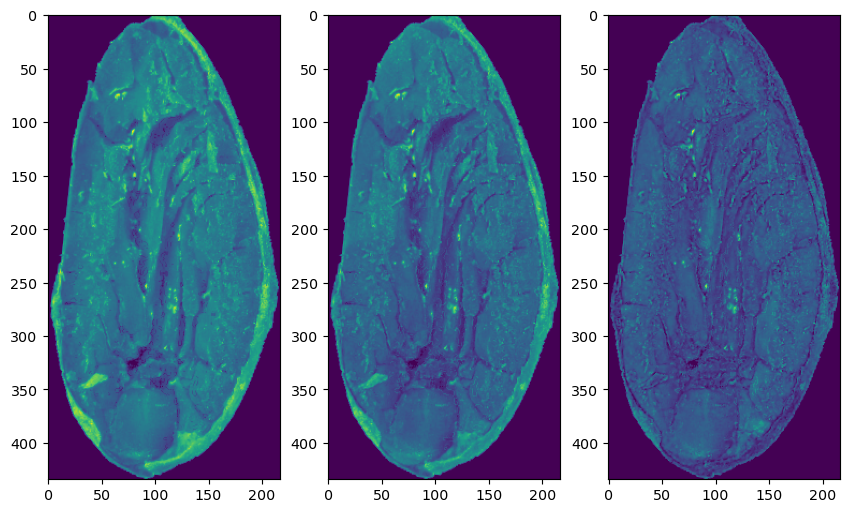

In [70]:
# h,s,v = cv2.split(image_hsv)
plt.rcParams["figure.figsize"] = (10,6)
r,g,b = seperate_chanel(image_rgb, plot=True)

In [ ]:
#gamma correct

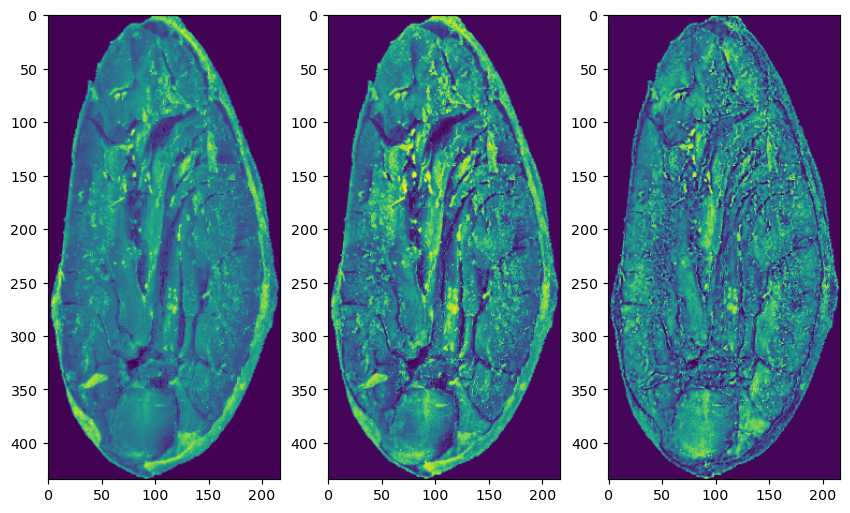

In [71]:
plt.rcParams["figure.figsize"] = (10,6)

clahe1 = cv2.createCLAHE(1, (8,8))
clahe2 = cv2.createCLAHE(4, (8,8))

clahe_r = clahe1.apply(r)
clahe_g = clahe2.apply(g)
clahe_b = clahe2.apply(b)
plt.subplot(1,3,1)
plt.imshow(clahe_r)
plt.subplot(1,3,2)
plt.imshow(clahe_g)
plt.subplot(1,3,3)
plt.imshow(clahe_b)

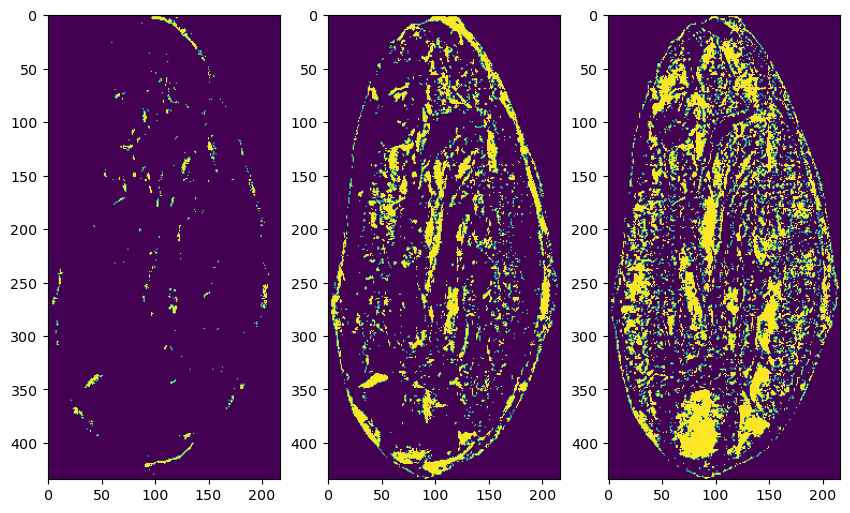

In [69]:
plt.rcParams["figure.figsize"] = (10,6)
ret, thr = cv2.threshold(clahe_r, 200, 255, cv2.THRESH_BINARY)
ret, thg = cv2.threshold(clahe_g, 160, 255, cv2.THRESH_BINARY)
ret, thb = cv2.threshold(clahe_b, 120, 255, cv2.THRESH_BINARY)

plt.subplot(1,3,1)
plt.imshow(thr)
plt.subplot(1,3,2)
plt.imshow(thg)
plt.subplot(1,3,3)
plt.imshow(thb)

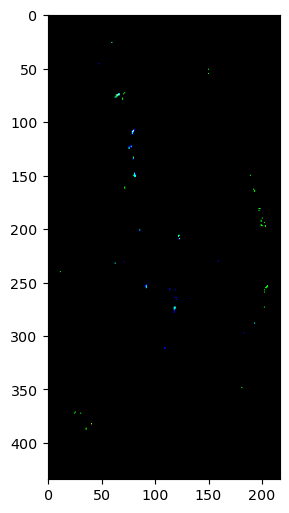

In [63]:
meg = cv2.merge([thr,thg, thb])
plt.imshow(meg)

[ 2.  4.  6.  8. 10. 12.]


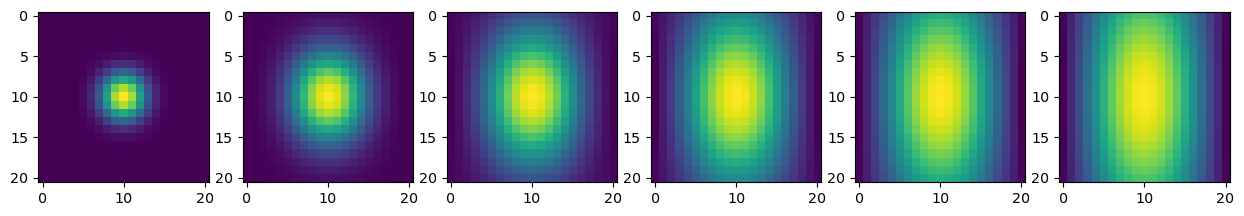

In [57]:
plt.rcParams["figure.figsize"] = (15,12)
pi = np.pi
theta = [0, pi/4, pi/2, 3*pi/4]
psi = np.linspace(2,12,6)
print(psi)
kernel = []
for j in range(len(psi)):
    plt.subplot(1, 6,+j+1)
    kernel.append(cv2.getGaborKernel((21,21), sigma=psi[j], theta=0, lambd=12*pi, gamma=1, psi=0))
    plt.imshow(kernel[len(kernel)-1])

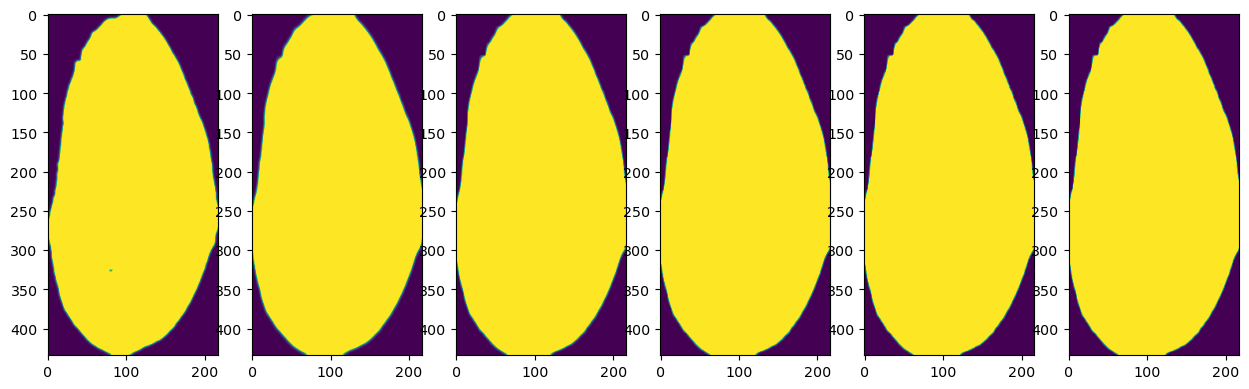

In [58]:
plt.rcParams["figure.figsize"] = (15,20)

gabor = []
for j in range(len(psi)):
    plt.subplot(1, 6,+j+1)
    im = cv2.filter2D(g, cv2.CV_8UC3, kernel[j])
    plt.imshow(im)
    gabor.append(im)